[0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


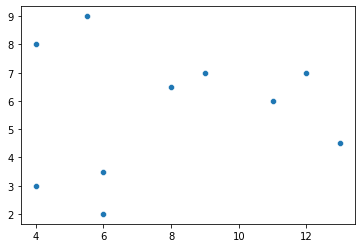

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


x1= np.array([6, 11, 4, 5.5, 9, 4, 8, 13, 6, 12],dtype=float)
y1= np.array([2, 6, 3, 9, 7, 8, 6.5, 4.5, 3.5, 7],dtype=float)

coor=np.array([
     [6, 2],
     [11, 6],
     [4, 3],
     [5.5, 9],
     [9, 7],
     [4, 8],
     [8, 6.5],
     [13, 4.5],
     [6, 3.5],
     [12, 7] ], dtype=float)

classification= np.zeros(coor.shape[0],dtype=int)
print(classification)
sns.scatterplot(coor.T[0],coor.T[1])


In [64]:
def distance_to_point(coor, coor_k,classification):
  for i,point in enumerate(coor):
    distance=[]
    for centroid in coor_k:
      distance.append( np.sqrt((point[0] - centroid[0] )**2 + (point[1] - centroid[1])**2) )
    #print( distance )
    classification[i] = distance.index(min(distance))
    

def update_k(coor,coor_k,classification):
  k_x= np.zeros((coor_k.shape[0],3))
  for i, point in enumerate(coor):
    k_x[classification[i] ][0] += point[0]
    k_x[classification[i] ][1] += point[1]
    k_x[classification[i] ][2] += 1
  
  for i,centroid in enumerate(k_x):
    if (centroid[2]==0):
      continue
    coor_k[i][0] = centroid[0]/centroid[2]
    coor_k[i][1] = centroid[1]/centroid[2]
  


[[ 4.75        8.5       ]
 [10.6         6.2       ]
 [ 5.33333333  2.83333333]]


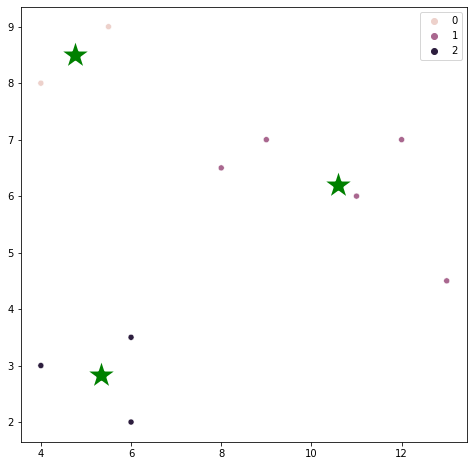

In [106]:
from random import randint

k=3
coor_k=np.zeros((k,2))
for i,centroid in enumerate(coor_k):
  opt=randint(0,len(coor)-1)
  coor_k[i]=coor[opt]

max_step=15
for i in range(max_step):
  distance_to_point(coor, coor_k, classification)
  update_k(coor, coor_k, classification)

print(coor_k)
plt.figure(figsize=(8,8))
sns.scatterplot(coor.T[0],coor.T[1],hue=classification)
sns.scatterplot(coor_k.T[0],coor_k.T[1],marker="*",s=1200,color='Green')  


In [105]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)